#  Web APIs

An API, or aplication programming interface, is the way programs communicate with one another. 

Web APIs are the way programs communicate with one another _over the internet_

[RESTful](https://en.wikipedia.org/wiki/Representational_state_transfer) APIs respect a series of design principles that make them simple to use.

The basic tools we are going to use are: POST and GET requests to urls we'll specify and json objects that we'll receive as response or send as payload (in a POST command, for example).

In [1]:
import requests

resp = requests.get('http://www.elpais.com/')
resp.content[:500]

b'<!DOCTYPE html>\n<html lang="es">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="format-detection" content="address=no,email=no,telephone=no">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0" />\n<title>EL PA\xc3\x8dS: el peri\xc3\xb3dico global</title>\n<meta name="lang" \t\t\tcontent="es" />\n<meta name="author" \t\tcontent="Ediciones El Pa\xc3\xads" />\n<meta name="description" \tcontent="Noticias de \xc3\xbaltima hora sobre la actualidad '

In [2]:
resp.content

b'<!DOCTYPE html>\n<html lang="es">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="format-detection" content="address=no,email=no,telephone=no">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0" />\n<title>EL PA\xc3\x8dS: el peri\xc3\xb3dico global</title>\n<meta name="lang" \t\t\tcontent="es" />\n<meta name="author" \t\tcontent="Ediciones El Pa\xc3\xads" />\n<meta name="description" \tcontent="Noticias de \xc3\xbaltima hora sobre la actualidad en Espa\xc3\xb1a y el mundo: pol\xc3\xadtica, econom\xc3\xada, deportes, cultura, sociedad, tecnolog\xc3\xada, gente, opini\xc3\xb3n, viajes, moda, televisi\xc3\xb3n, los blogs y las firmas de EL PA\xc3\x8dS. Adem\xc3\xa1s especiales, v\xc3\xaddeos, fotos, audios, gr\xc3\xa1ficos, entrevistas, promociones y todos los servicios de EL PA\xc3\x8dS." />\n<meta name="keywords" \t\tcontent="noticias, \xc3\xbaltima hora, actualidad, nacional, Espa\xc3\xb1a, cca

This is an API that returns the current position of the ISS:

In [3]:
r = requests.get('http://api.open-notify.org/iss-now.json')
r.status_code

200

In [4]:
r.content

b'{"timestamp": 1544378218, "iss_position": {"longitude": "99.7949", "latitude": "-41.0630"}, "message": "success"}'

We can convert a json-formatted string such as the one we get in the response into a Python object with the json library:

In [5]:
import json 

pos = json.loads(r.content)
pos

{'iss_position': {'latitude': '-41.0630', 'longitude': '99.7949'},
 'message': 'success',
 'timestamp': 1544378218}

In [6]:
pos['iss_position']['latitude']

'-41.0630'

In [7]:
import pandas as pd

pd.read_json('http://api.open-notify.org/iss-now.json')

,iss_position,message,timestamp
latitude,-41.1365,success,2018-12-09 17:57:00
longitude,99.9281,success,2018-12-09 17:57:00


We also can go in the other direction and generate json-formatted strings from Python objects:

In [8]:
mi_diccionario = {'Chicago' : "Illinois", "Kansas City" : ["Kansas", "Missouri"]}

In [9]:
mi_diccionario

{'Chicago': 'Illinois', 'Kansas City': ['Kansas', 'Missouri']}

In [10]:
json.dumps(mi_diccionario)

'{"Chicago": "Illinois", "Kansas City": ["Kansas", "Missouri"]}'

#### Exercise:
Write a function that returns the duration of the next 5 overhead passes of the ISS for a given latitude and longitude. Use http://open-notify.org/Open-Notify-API/ISS-Pass-Times/
. We are going to need to encode the parameters in the url as per the specification.

For example, for Madrid:

http://api.open-notify.org/iss-pass.json?lat=40.4&lon=-3.7

In [11]:
def get_iss(lat, lon):
    
    url = "http://api.open-notify.org/iss-pass.json?lat=%f&lon=%f" % (lat, lon)
    response = requests.get(url)
    my_dict = json.loads(response.content)
    result = my_dict['response']
    
    return result

get_iss(40.0, 3.5)

[{'duration': 600, 'risetime': 1544375994},
 {'duration': 632, 'risetime': 1544381778},
 {'duration': 383, 'risetime': 1544387650},
 {'duration': 423, 'risetime': 1544436084},
 {'duration': 638, 'risetime': 1544441727}]

Although we managed to get the response, more complicated sets of parameters will be a complicated and error-prone thing to encode. Thankfully, the `requests` library can do that work for us.

In [12]:
madrid_coords = {'lat': 40.4, 'lon': -3.7}

r = requests.get('http://api.open-notify.org/iss-pass.json', params=madrid_coords)
json.loads(r.content)

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1544375482,
  'latitude': 40.4,
  'longitude': -3.7,
  'passes': 5},
 'response': [{'duration': 579, 'risetime': 1544375917},
  {'duration': 639, 'risetime': 1544381702},
  {'duration': 514, 'risetime': 1544387526},
  {'duration': 72, 'risetime': 1544436215},
  {'duration': 612, 'risetime': 1544441679}]}

In [13]:
resp = json.loads(r.content)['response']

pd.DataFrame(resp)

,duration,risetime
0,579,1544375917
1,639,1544381702
2,514,1544387526
3,72,1544436215
4,612,1544441679


Even more complicated sets of parameters are sometimes required. When that is the case, API designers often decide to require them in json format, received via a `POST` request.

For example, take a look at the [QPX api from Google](https://developers.google.com/qpx-express/v1/trips/search). In the documentation, they define the body of the request, which we will have to provide, and of the response, which they'll provide back.

In [14]:
help(requests.post)

Help on function post in module requests.api:

post(url, data=None, json=None, **kwargs)
    Sends a POST request.
    
    :param url: URL for the new :class:`Request` object.
    :param data: (optional) Dictionary (will be form-encoded), bytes, or file-like object to send in the body of the :class:`Request`.
    :param json: (optional) json data to send in the body of the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



# Web scraping

![HTML to DOM](http://www.cs.toronto.edu/~shiva/cscb07/img/dom/treeStructure.png)

![DOM TREE](http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png)



In [15]:
from IPython.display import IFrame

In [16]:
IFrame('https://aflcio.org/what-unions-do/social-economic-justice/advocacy/legislative-alerts', 400, 400)

In [17]:
from bs4 import BeautifulSoup

r = requests.get('https://aflcio.org/what-unions-do/social-economic-justice/advocacy/legislative-alerts')

page = r.content
page[:1000]

b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <meta charset="utf-8" /><script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<t.length;o++)r(t[o]);return r}({1:[function(e,n,t){function r(){}function o(e,n,t){return function(){return i(e,[c.now()].concat(u(arguments)),n?null:this,t),n?void 0:this}}var i=e("handle"),a=e(3),u=e(4),f=e("ee").get("tracer"),c=e("loade

In [18]:
soup = BeautifulSoup(page, 'html5lib')
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<t.length;o++)r(t[o]);return r}({1:[function(e,n,t){function r(){}function o(e,n,t){return function(){return i(e,[c.now()].concat(u(arguments)),n?null:this,t),n?void 0:this}}var i=e("handle"),a=e(3),u=e(4),f=e("ee").get("tracer"),c=e("loader"

In [19]:
print(soup.prettify()[28700:30500])

/h5>
                  <h2 class="content-title">
                   <span>
                    Letter Opposing Nominations to the Merit Systems Protection Board
                   </span>
                  </h2>
                  <time datetime="2018-08-29T15:19:53-0400">
                   August 29, 2018
                  </time>
                 </div>
                </a>
                <div>
                </div>
               </div>
              </div>
              <div class="block block-content col-12 col-lg-4">
               <div class="content-details ">
                <a class="b-inner" href="/about/advocacy/legislative-alerts/letter-opposing-bill-would-undermine-financial-market-regulation">
                 <div class="b-text">
                  <h5 class="content-type">
                   Legislative Alert
                  </h5>
                  <h2 class="content-title">
                   <span>
                    Letter Opposing Bill That Would Undermine Fin

In [20]:
help(soup.find_all)

Help on method find_all in module bs4.element:

find_all(name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs) method of bs4.BeautifulSoup instance
    Extracts a list of Tag objects that match the given
    criteria.  You can specify the name of the Tag and any
    attributes you want the Tag to have.
    
    The value of a key-value pair in the 'attrs' map can be a
    string, a list of strings, a regular expression object, or a
    callable that takes a string and returns whether or not the
    string matches for some custom definition of 'matches'. The
    same is true of the tag name.



In [21]:
alerts = soup.find_all('div', class_='content-details')
print(len(alerts))
type(alerts)

18


bs4.element.ResultSet

In [22]:
alerts[0]

<div class="content-details ">
	<a class="b-inner" href="/aboutadvocacylegislative-alerts/letter-opposing-nomination-eric-murphy-us-court-appeals-sixth">
	  <div class="b-text">
              <h5 class="content-type">Legislative Alert</h5>
        <h2 class="content-title"><span>Letter Opposing the Nomination of Eric Murphy to the U.S. Court of Appeals Sixth Circuit</span>
</h2>
              <time datetime="2018-11-14T15:22:18-0500">November 14, 2018</time>
          </div>
	</a>
  <div></div>
</div>

In [23]:
first = alerts[0]
print(first.find('time').get_text())
print(first.a.find('span').get_text())
print(first.a['href'])

November 14, 2018
Letter Opposing the Nomination of Eric Murphy to the U.S. Court of Appeals Sixth Circuit
/aboutadvocacylegislative-alerts/letter-opposing-nomination-eric-murphy-us-court-appeals-sixth


In [24]:
def get_aflcio_alerts():
    result = []
    r = requests.get('http://www.aflcio.org/Legislation-and-Politics/Legislative-Alerts')
    soup = BeautifulSoup(r.content, 'html5lib')
    
    for alert in soup.find_all('div', class_='content-details'):
        dictionary = {}
        dictionary['date'] = alert.find('time').get_text()
        dictionary['title'] = alert.a.find('span').get_text()
        dictionary['link'] = 'http://www.aflcio.org' + alert.a['href']
        
        result.append(dictionary)
        
    return result

In [25]:
letters = get_aflcio_alerts()
letters[:2]

[{'date': 'November 14, 2018',
  'link': 'http://www.aflcio.org/aboutadvocacylegislative-alerts/letter-opposing-nomination-eric-murphy-us-court-appeals-sixth',
  'title': 'Letter Opposing the Nomination of Eric Murphy to the U.S. Court of Appeals Sixth Circuit'},
 {'date': 'November 14, 2018',
  'link': 'http://www.aflcio.org/aboutadvocacylegislative-alerts/letter-opposing-nomination-chad-readler-us-court-appeals-sixth',
  'title': 'Letter Opposing the Nomination of Chad Readler to the U.S. Court of Appeals Sixth Circuit'}]

In [26]:
# And we come full circle! We encode the list we created in 
# a json string. We could then provide that over the internet
# in our own API!!

json.dumps(letters)[:1000]

'[{"date": "November 14, 2018", "title": "Letter Opposing the Nomination of Eric Murphy to the U.S. Court of Appeals Sixth Circuit", "link": "http://www.aflcio.org/aboutadvocacylegislative-alerts/letter-opposing-nomination-eric-murphy-us-court-appeals-sixth"}, {"date": "November 14, 2018", "title": "Letter Opposing the Nomination of Chad Readler to the U.S. Court of Appeals Sixth Circuit", "link": "http://www.aflcio.org/aboutadvocacylegislative-alerts/letter-opposing-nomination-chad-readler-us-court-appeals-sixth"}, {"date": "September 26, 2018", "title": "Letter Supporting Legislation That Strengthens U.S. Copyright Office", "link": "http://www.aflcio.org/aboutadvocacylegislative-alerts/letter-supporting-legislation-strengthens-us-copyright-office"}, {"date": "September 13, 2018", "title": "Letter Opposing Bill That Would Threaten Health Care Coverage For Millions", "link": "http://www.aflcio.org/about/advocacy/legislative-alerts/letter-opposing-bill-would-threaten-health-care-coverag

# Annex: ultra easy scraping with pandas!

When the data we want is already formatted as a table, we can do it even more easily! Just use `pandas.read_html`:

In [27]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll', header=0)

In [28]:
tables[4].head()

,Deaths,Date,Incident,Unnamed: 3
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t...",NaN
1,3000,18 August 1769,A lightning bolt caused the Brescia Explosion ...,NaN
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,NaN
3,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[59]",NaN
4,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,NaN


# Annex II: exercises

### Exercise:

Extract the date of the worst aviation disaster from: https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html

In [29]:
aviation = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll', header=0)[2]
aviation.head(1)['Date']

0    27 March 1977
Name: Date, dtype: object

### Exercise: 

Assuming the list is exhaustive, calculate how many people died in accidental explosions per decade in the XX century. Plot it.

Data: 
https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html, pd.to_datetime, matplotlib or seaborn

In [30]:
explosions = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll', header=0)[4]
explosions.head()

,Deaths,Date,Incident,Unnamed: 3
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t...",NaN
1,3000,18 August 1769,A lightning bolt caused the Brescia Explosion ...,NaN
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...,NaN
3,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[59]",NaN
4,1500,8 June 1941,Ammunition plant with facilities explode at Sm...,NaN


In [31]:
explosions['date'] = explosions['Date'].str[8:18]

In [32]:
explosions['Deaths'] = pd.to_numeric(explosions.Deaths.str.replace('[^0-9]', ''))

In [33]:
explosions['Decade'] = explosions['date'].str[:3] + '0s'

In [34]:
twentieth_century = explosions[(explosions['Decade'] > '1900') & (explosions['Decade'] < '2000')]
per_decade = twentieth_century.groupby('Decade')['Deaths'].sum()

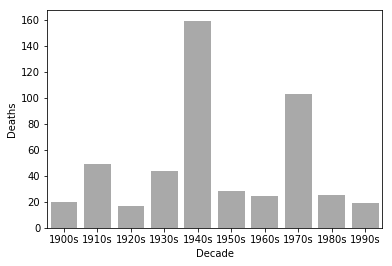

In [35]:
import seaborn as sns
%matplotlib inline

sns.barplot(data=twentieth_century, 
            x='Decade', 
            y='Deaths', 
            order=sorted(twentieth_century['Decade'].unique()),
            ci=None,
            color='darkgrey')

### Exercise: 

create a function that, given the two tables extracted from http://en.wikipedia.org/wiki/List_of_S%26P_500_companies and a date, returns the list of companies in the S&P 500 at that date.

In [36]:
def companies_at_date(url, date):
    df = pd.read_html(url, header=0)[0]
    df['Date first added[3][4]'] = pd.to_datetime(df.iloc[:,6])
    return df[df['Date first added[3][4]'] < date]['Security'].unique()

list_compies = companies_at_date('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies', '2014-12-03')
list_compies

array(['Abbott Laboratories', 'AbbVie Inc.', 'Accenture plc',
       'Adobe Systems Inc', 'AES Corp', 'Affiliated Managers Group Inc',
       'AFLAC Inc', 'Agilent Technologies Inc',
       'Air Products & Chemicals Inc', 'Akamai Technologies Inc',
       'Alexion Pharmaceuticals', 'Allegion', 'Allergan, Plc',
       'Alliance Data Systems', 'Allstate Corp', 'Alphabet Inc Class A',
       'Alphabet Inc Class C', 'Amazon.com Inc.', 'Ameren Corp',
       'American Express Co', 'American International Group, Inc.',
       'American Tower Corp.', 'Ameriprise Financial',
       'AmerisourceBergen Corp', 'AMETEK Inc.', 'Amgen Inc.',
       'Amphenol Corp', 'Anadarko Petroleum Corp', 'Analog Devices, Inc.',
       'Anthem Inc.', 'Aon plc', 'Apache Corporation',
       'Apartment Investment & Management (Aimco)', 'Apple Inc.',
       'Applied Materials Inc.', 'Aptiv Plc', 'Archer-Daniels-Midland Co',
       'Arconic Inc.', 'Assurant Inc.', 'AT&T Inc.', 'Autodesk Inc.',
       'Automatic Data P